# 04 Statistics Review
__Math 3080: Fundamentals of Data Science__

Reading:
* Grus, Chapter 5 - Statistics
* Phillips, Chapter 1 - Probability Review
* Grus, Chapter 6 - Probability

Outline:
1. Types of Data
2. Summary Statistics
3. Probability
4. Expected Values, Variance, and Covariance
5. Bayes' Theorem
6. Correlation
7. Linear Regression

## 4.1 Types of Data
* Quantitative (Numerical)
  * Discrete / Continuous
* Qualitative (Categorical)
  * Nominal / Ordinal

Quantitative data can become *categorized* when we put specific numbers in bins, as we do with a histogram.

We summarize quantitative data using __Summary Statistics__. We summary categorical data by using __Probability__. Merging the two, you get into __normal distributions__, which we use to tell information about a population (__confidence intervals__ and __hypothesis testing__).

## 4.2 Summary Statistics
* Mean
* Median
* Mode
  * Skewness
* Quartiles
* Variance
  * Standard Deviation
* Covariance (2 variables)
* Correlation

In [1]:
import numpy as np

from scipy import stats

x = np.random.randint(50, size=125)
x

array([37,  2, 48, 25, 11,  6, 38, 13, 40, 18, 41, 31, 36, 16, 17, 41, 39,
       23, 27,  7, 13, 39, 23, 23, 17, 13, 29,  0,  7, 44, 26,  6, 27, 11,
       37, 15, 42, 44, 38, 46, 34, 39, 31, 47, 32, 29, 17, 33, 21,  2, 29,
        0, 15, 11, 29, 33, 29,  3, 32, 41,  6, 21, 18, 28, 42, 33,  3,  8,
        2, 42, 49, 42, 30, 43, 44, 39, 30, 49, 33, 21,  5,  3, 27, 47, 26,
       43, 24, 49,  9, 24, 34, 20, 21, 49, 29, 22,  3,  8, 36, 46, 16, 16,
       19, 25, 13, 10,  1,  5,  4, 48, 36, 48, 19,  1, 30, 41, 40, 40,  9,
       30, 45, 32, 13, 18,  9])

#### Mean
The mean is the average of all values.
$$\bar{x} = \frac{\sum_{i=1}^n x_i}{n}$$

In [2]:
# Mean
np.mean(x)

25.592

#### Median
The median is the value that is the very center of an ordered dataset

In [3]:
# Median
np.median(x)

27.0

#### Mode
The mode is the most recurring element in a dataset
* If two numbers qualify as the most recurring, the dataset is referred to as "bimodal"
* In python, only the first modal value is returned

In [4]:
# Mode
from scipy import stats
stats.mode(x, keepdims=False)

ModeResult(mode=29, count=6)

The mean, median, and mode helped us to understand the *center* of the data. But in addition to the center, we also want to know the *spread* of the data.

#### Quartiles and Percentiles
When the dataset is divided into 4 equal pieces (quarters), then the values separating those quarters are known as __quartiles__.
* Likewise, when the dataset is divided into 100 equal pieces, then the values separating those pieces are known as __percentiles__.

In [5]:
# Quartiles (or percentiles)

quartile0 = np.quantile(x,0)     # Minimum
quartile1 = np.quantile(x,0.25)  # 1st quartile = 25th percentile
quartile2 = np.quantile(x,0.5)   # Median = 2nd quartile = 50th percentile
quartile3 = np.quantile(x,0.75)  # 3rd quartile = 75th percentile
quartile4 = np.quantile(x,1)     # Maximum = 4th quartile = 100th percentile

percentile36 = np.quantile(x,0.36)

print(np.array([quartile0, quartile1, quartile2, quartile3, quartile4]))

[ 0. 13. 27. 39. 49.]


Quartiles are often depicted with a __boxplot__.

<AxesSubplot: >

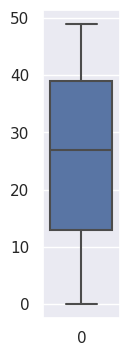

In [6]:
import seaborn as sns # The Seaborn package makes plotting with pandas convenient and high-quality

sns.set(rc={'figure.figsize':(1,4)}) # Size of the figure

sns.boxplot(data=x)

#### Variance
We want to measure how far the data is from the mean. But if we take the average distance from the mean, then we are going to get 0 because there are an equal number of elements less than the mean as there are greater than the mean. So, let's get rid of that problem by squaring the deviation:
* Take the deviation: 
$$(x_i-\bar{x})$$
* Square the deviation to get rid of the negatives in the deviations
$$(x_i-\bar{x})^2$$
* Take the mean of the squared deviations. 
$$var(x) = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n}$$
* When dealing with samples, this is not exactly right. There is an issue referred to as degrees of freedom. To correct, we instead divide by $n-1$. This is the __variance__, or a measure of how much variation there is within the data
$$var(x) = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1}$$

In [10]:
def variance(x):
    return sum((x-np.mean(x))**2) / (len(x))

In [11]:
# Using our function
variance(x)

208.43353600000003

In [9]:
# Using the built-in function
np.var(x)

208.43353599999998

But the units of variance are the squared unit of the data. For example, if we have a financial record and the data are in dollars, then the variance has a unit of dollars squared $(\$^2)$. To correct for this, we take the square root. This is known as the __standard deviation__.
$$StDev(x)=\sqrt{\frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1}}$$

In [12]:
# Using our function
np.sqrt(variance(x))

14.43722743465656

In [13]:
# Using the built-in function
np.std(x)

14.437227434656558

## 4.3 Probability
* Sample Spaces $\Omega = \{\omega_1,\omega_2, \dots ,\omega_n\}$
* Outcomes $\omega\in\Omega$
* Events $A=\{\omega_i,\omega_j,...\}\subset\Omega$
* Probabilities
  * $0 \le Pr(A) \le 1$ for any $A$
  * $Pr(\Omega)=\sum Pr(\omega) = 1$
  * The probability of disjoint events is the sum of their individual probabilities

$$Pr(\cup_{i=1} A_i) = \sum_{i=1} Pr(A_i)$$

It is easiest to consider probabilities with discrete variables. But this can also be done with continuous variables.
* Weather: Probabilities of precipitation 
* Departure of airline flights (Takeoff at 6:24 means any time between 6:24 and 6:25. Takeoff itself starts at 6:24:15 and takes 40 seconds.)

### Two events
When two events occur (whether from the same sample space or different sample spaces), there is a chance that they both occur. Mathematically, this is the region where event $A$ intesects with event $B$: $A\cap B$.
* Favorite flavor of ice cream
  * 25% of students like Vanilla-based ice cream over chocolate- or fruit-based ice cream
  * 40% of students like chocolate-based ice cream
* Servings
  * 38% of students prefer having their ice cream in a bowl instead of a cone.
* (Draw these as a scaled confusion matrix - drawn in perfect rows and columns whose size depict the percentage)

This is an example of two __independent events__ because the preference of ice cream flavor is unrelated to the preference of bowl or cone. When this is the case, $Pr(A\cap B) = Pr(A)Pr(B)$.

$$Pr(Vanilla\cap bowl) = 25\%\cdot 38\% = 0.25\cdot 0.38 = 0.095 = 9.5\%$$

### Conditional Probabilities
Two events are known as __dependent__ if the decision of one influences the decision of the other. For example, the preference of ice cream topping may be influenced by the ice cream flavor. When this is the case,
$$Pr(A|B)= \frac{Pr(A\cap B)}{Pr(B)}$$

* Of the 25\% of students who like Vanilla-based ice cream, 65\% prefer chocolate topping
  * $Pr(Chocolate~topping | Vanilla) = 65\%=0.65$
  * $Pr(Chocolate~topping\cap Vanilla) = Pr(Chocolate~topping | Vanilla)Pr(Vanilla) = 0.65 \cdot 0.25 = 0.1625 = 16.25\%$

* Of the 75\% of students who don't prefer Vanilla-based ice cream, 40\% prefer chocolate topping
  * $0.25 \cdot 0.40 = 0.10 = 10\%$
* (Draw these as a staggered confusion matrix - column is divided by percentage of one variable, but the rows are staggered by the percentage of the other variable)


$$Pr(Vanilla\cap Chocolate~topping) = 25\%\cdot 65\% = 0.25\cdot 0.65 = .1625 = 16.25\%$$

## Density Functions and Normal Distributions
The ice cream example was an example of a discrete variable: either you do like Vanilla-based ice cream or you don't. But in the case of a continuous variable, we need to involve calculus.



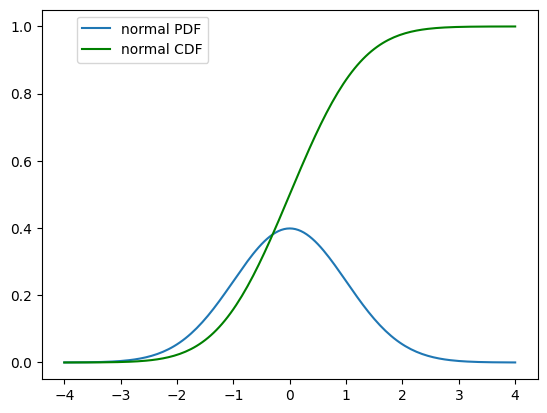

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 161)

from scipy.stats import norm

# Plot the Probability Density Function
y = np.exp(-(x**2)/2)/np.sqrt(2*np.pi)
plt.plot(x, y, label='normal PDF')

#plt.plot(x, norm.pdf(x), linestyle="--", linewidth=0.7, label='another normal')


# Plot the Probability Density Function
plt.plot(x, norm.cdf(x), color='green', label='normal CDF')

# Show the figure
plt.legend(bbox_to_anchor=(.35, 1))
plt.show()

## 4.4 Expected Values, Variance, and Covariance


## 4.5. Bayes' Theorem


## 4.6. Correlation
* Correlation
  * How to calculate correlation
  $$r=\frac{1}{n-1}\sum\left(\frac{x-\bar{x}}{s_x}\frac{y-\bar{y}}{s_y}\right)$$
  * Linear algebra methods
  * Calculating and plotting on Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
n = 30 # Number of datapoints
m = np.random.randint(1,100)/10.0 # Slope off of which data is based.

x = np.random.randint(0,20,n)
y = m*x + np.random.randint(2,100,n)/10.0

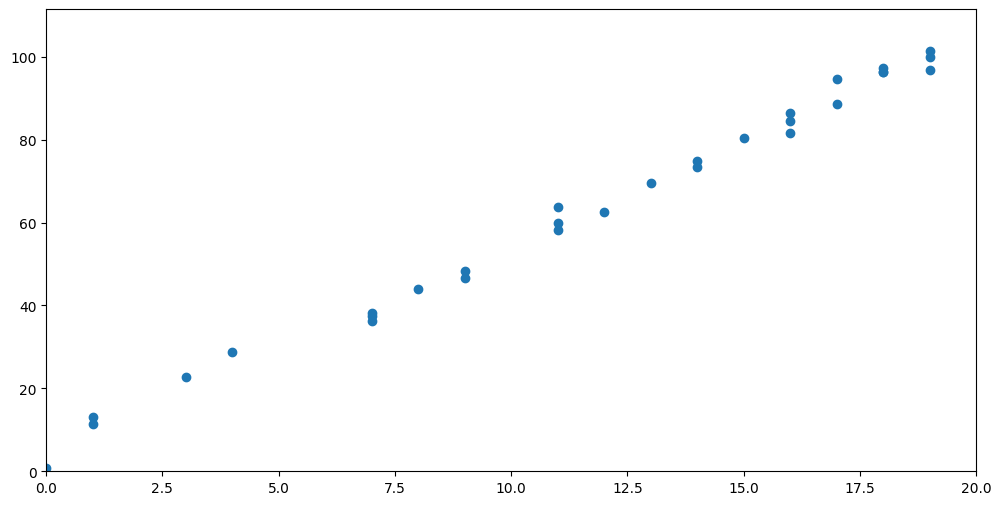

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = plt.scatter(x,y)
plt.xlim([0,20])
plt.ylim([0,(max(y)*1.10)])
plt.show()

In [45]:
def correlation(x,y):
    x_deviation = x - np.mean(x)
    print(x_deviation)
    y_deviation = y - np.mean(y)
    print(y_deviation)
    x_std = np.std(x)
    y_std = np.std(y)
    return np.dot(x_deviation,y_deviation)/x_std/y_std/(len(x))

correlation(x,y)

[  6.33333333  -2.66666667   3.33333333 -10.66666667   7.33333333
  -0.66666667  -4.66666667 -11.66666667   2.33333333   6.33333333
   4.33333333  -8.66666667  -4.66666667   2.33333333   1.33333333
   0.33333333   4.33333333   5.33333333 -10.66666667   5.33333333
  -3.66666667  -4.66666667   7.33333333  -0.66666667  -7.66666667
  -0.66666667   6.33333333  -2.66666667   4.33333333   7.33333333]
[ 33.15666667 -14.74333333  17.35666667 -49.94333333  38.15666667
  -3.14333333 -26.94333333 -62.24333333  11.75666667  33.15666667
  23.25666667 -40.34333333 -25.64333333  10.25666667   6.35666667
  -0.64333333  21.35666667  31.45666667 -51.74333333  25.35666667
 -19.14333333 -25.04333333  33.65666667  -4.84333333 -34.34333333
   0.65666667  34.15666667 -16.54333333  18.35666667  36.85666667]


0.9965898627635601

In [46]:
np.corrcoef(x,y)

array([[1.        , 0.99658986],
       [0.99658986, 1.        ]])

* Correlation of multiple vectors

In [52]:
x = np.random.random((3,3))
x

array([[0.01990922, 0.96227973, 0.51808839],
       [0.00803278, 0.20924602, 0.75748742],
       [0.49988509, 0.15845277, 0.06477485]])

In [53]:
np.corrcoef(x)

array([[ 1.        ,  0.29115587, -0.7670816 ],
       [ 0.29115587,  1.        , -0.83709512],
       [-0.7670816 , -0.83709512,  1.        ]])

* Correlation vs. Causation

## 4.7. Linear Regression
* Linear Regression
* Error analysis